<a href="https://colab.research.google.com/github/yj1990/PyFed/blob/master/H8_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! rm -rf  PyFed
! git clone https://github.com/yj1990/PyFed

Cloning into 'PyFed'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 146 (delta 83), reused 87 (delta 37), pack-reused 0
Receiving objects: 100% (146/146), 2.25 MiB | 8.83 MiB/s, done.
Resolving deltas: 100% (83/83), done.


In [3]:
! pip install quandl fredapi

In [4]:
import os
ROOT_DIR = "."
try:
    os.chdir(os.path.join(ROOT_DIR,'PyFed'))
except:
    pass

import PyFed.interest_rate as ir
import PyFed.money_stock as ms
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
H8 = ms.FRB_H8.H8()

In [6]:
df = H8.book

In [9]:
H8.info()

All Commercial Banks, NSA
B1001NCBD: Bank credit
B1002NCBD: 	Securities in bank credit
B1003NCBD: 		Treasury and agency securities
B1301NCBD: 			Agency MBS
B1302NCBD: 			Treasuries
B1011NCBD: 		Other securities
B1303NCBD: 			Non-Agency MBS
B1304NCBD: 			Securities other than MBS or Treasuries
B1020NCBD: 	Loans and leases in bank credit
B1023NCBD: 		Commercial and industrial loans
B1026NCBD: 		Real estate loans
B1221NCBD: 			Residential real estate loans
B1027NCBD: 				Revolving home equity loans
B1220NCBD: 				Closed-end residential loans
B3219NCBD: 			Commercial real estate loans
B1215NCBD: 				Construction and land development loans
B1216NCBD: 				Secured by farmland
B1217NCBD: 				Secured by multifamily properties
B1218NCBD: 				Secured by nonfarm nonresidential properties
B1029NCBD: 		Consumer loans
B1247NCBD: 			Credit cards and other revolving plans
B3248NCBD: 			Other consumer loans
B1243NCBD: 				Automobile loans
B1245NCBD: 				All other consumer loans
B3305NCBD: 		All other lo

In [12]:
def two_column_line_plot(df, col1, col2, start_date_1='2008', start_date_2='2008', sharey = False):
  df.index.names
  
  fig, axes = plt.subplots(1,2, figsize=(12,5), sharey = sharey)
  df[col1].unstack()[start_date_1:].apply(lambda x: x/1000).plot(color = ['r','b','gray'], ax=axes[0])
  df[col2].unstack()[start_date_2:].apply(lambda x: x/1000).plot(color = ['r','b','gray'], ax=axes[1])

  axes[0].set_ylabel('Billion Dollars')
  axes[0].set_title(col1)
  axes[1].set_ylabel('Billion Dollars')
  axes[1].set_title(col2)

  for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))

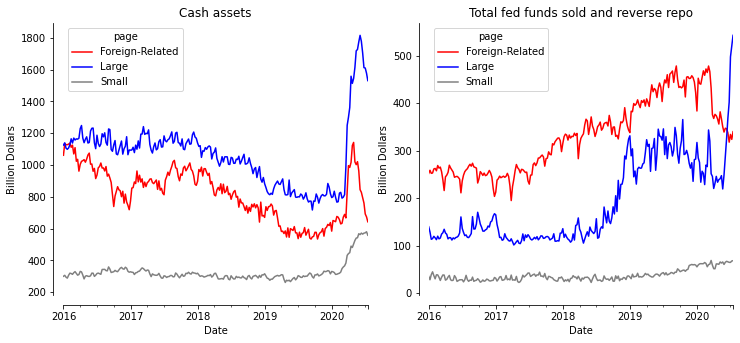

In [14]:
two_column_line_plot(df,'Cash assets', 'Total fed funds sold and reverse repo', start_date_1 = '2016', start_date_2 = '2016')

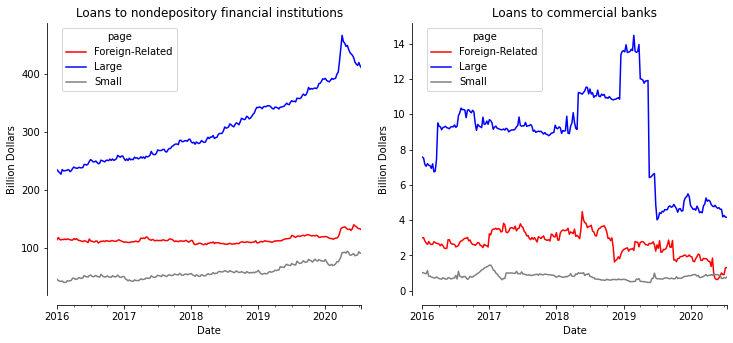

In [17]:
two_column_line_plot(df,'Loans to nondepository financial institutions', 'Loans to commercial banks', 
                     start_date_1 = '2016', start_date_2 = '2016')

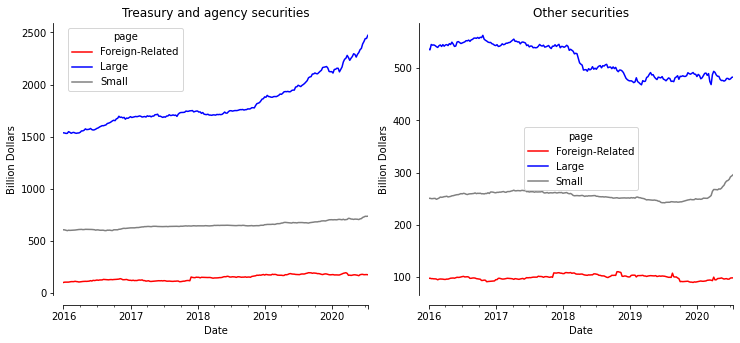

In [18]:
two_column_line_plot(df,'Treasury and agency securities', 'Other securities', start_date_1 = '2016', start_date_2 = '2016')

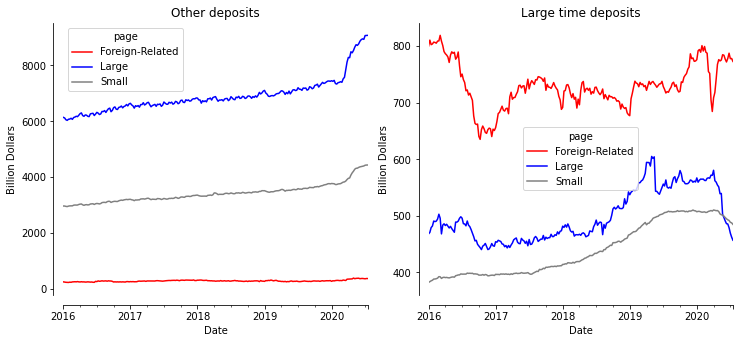

In [19]:
two_column_line_plot(df,'Other deposits', 'Large time deposits', start_date_1 = '2016', start_date_2 = '2016')

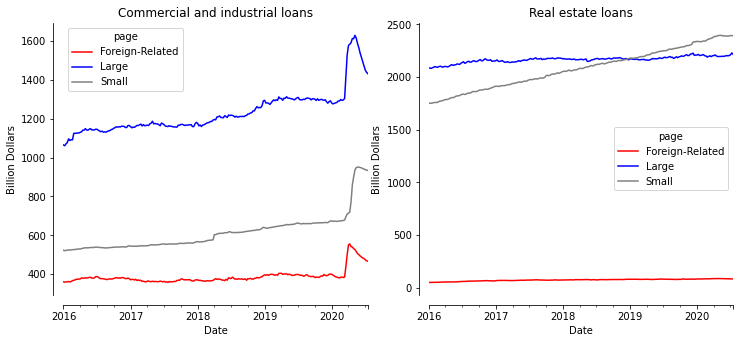

In [20]:
two_column_line_plot(df,'Commercial and industrial loans', 'Real estate loans', start_date_1 = '2016', start_date_2 = '2016')

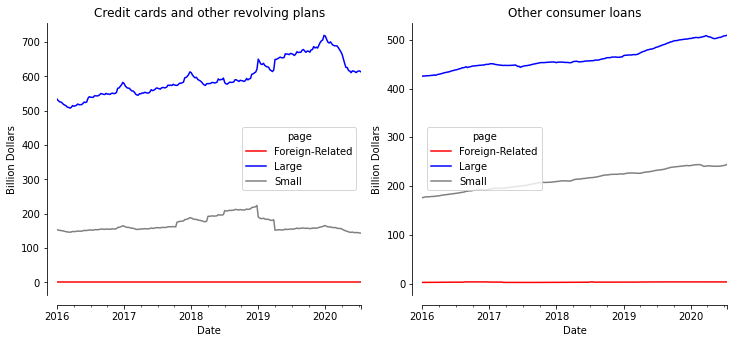

In [21]:
two_column_line_plot(df,'Credit cards and other revolving plans', 'Other consumer loans', start_date_1 = '2016', start_date_2 = '2016')